## Tarea de agrupamiento por similitud



## Referencias

1. [Python Data Science Notebook]("https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html")
2. [Datos a utilizar: PrepTrack.csv]("...")

## 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df=pd.read_csv('202210_Laboratorio2_data_202210_Lab2_BancAlpes_CC_data.csv', sep=',', encoding = 'utf-8', index_col=False)

## 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df.shape

(5530, 15)

In [ ]:
df.head()

,CUST_ID,GENDER,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C12529,F,107.944741,118.16,0.875,472.818286,1.0,0.125000,2,0.125,0.125000,2500.0,192.781455,56.999671,8
1,C14138,NaN,241.032979,0.00,1.000,642.862505,1.0,0.000000,0,NaN,0.083333,1500.0,915.454305,195.162256,12
2,C15409,NaN,894.357857,1164.00,1.000,0.0,0.0,1.000000,12,NaN,0.000000,2000.0,907.603723,270.413449,-12
3,C18141,F,-188.132508,515.88,1.000,0.0,NaN,0.833333,14,NaN,0.000000,2700.0,601.729266,194.534934,12
4,C15879,NaN,3881.679582,15.92,1.000,2183.782456,9.0,0.083333,1,NaN,0.333333,5500.0,1032.183632,1129.747227,12


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530 entries, 0 to 5529
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CUST_ID                     5530 non-null   object 
 1   GENDER                      2816 non-null   object 
 2   BALANCE                     5530 non-null   float64
 3   PURCHASES                   5530 non-null   float64
 4   BALANCE_FREQUENCY           5530 non-null   float64
 5   CASH_ADVANCE                5530 non-null   object 
 6   CASH_ADVANCE_TRX            5380 non-null   float64
 7   PURCHASES_FREQUENCY         5530 non-null   float64
 8   PURCHASES_TRX               5530 non-null   object 
 9   ONEOFF_PURCHASES_FREQUENCY  2790 non-null   float64
 10  CASH_ADVANCE_FREQUENCY      5364 non-null   float64
 11  CREDIT_LIMIT                5530 non-null   float64
 12  PAYMENTS                    5530 non-null   float64
 13  MINIMUM_PAYMENTS            5530 

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
count,5530.000000,5530.000000,5530.000000,5380.000000,5530.000000,2790.000000,5364.000000,5530.000000,5530.000000
mean,1041.700463,534.577103,26.482552,49.115428,12.206006,0.148298,0.119005,3588.095256,1107.989817
std,1353.093044,773.488745,152.899316,573.817771,93.757671,0.241687,0.173206,2640.396238,1270.892564
min,-4587.892398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.056466
25%,74.060304,0.000000,0.833333,0.000000,0.000000,0.000000,0.000000,1500.000000,345.431102
50%,632.743634,269.130000,1.000000,0.000000,0.363636,0.000000,0.000000,2900.000000,671.001700
75%,1545.808455,723.700000,1.000000,3.000000,0.833333,0.166667,0.166667,5000.000000,1354.931507
max,7390.198560,9661.370000,1000.000000,18000.000000,1000.000000,1.000000,1.500000,12500.000000,9933.622610


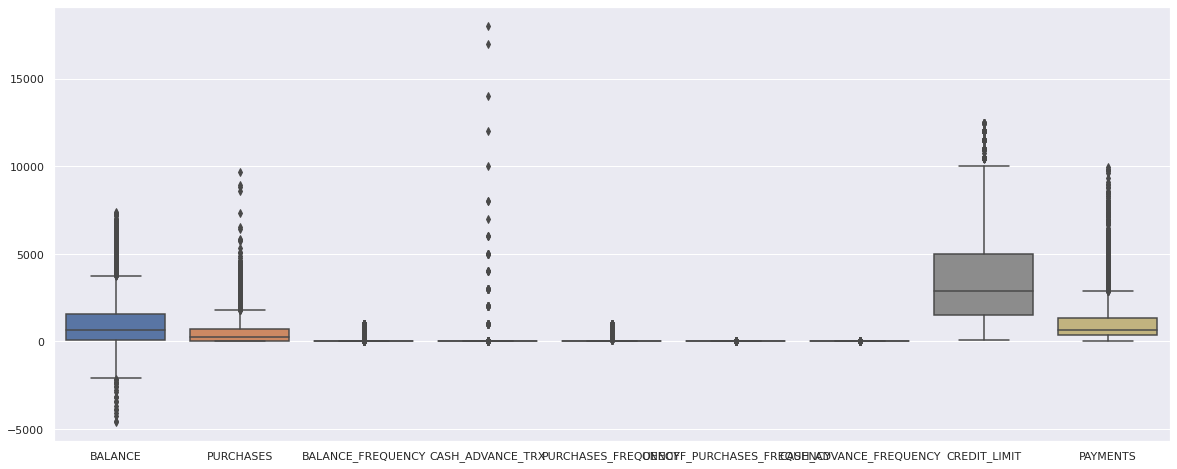

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['CUST_ID', 'GENDER', 'CASH_ADVANCE', 'PURCHASES_TRX',
       'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [ ]:
# Revisamos el contenido de las columnas no numéricas
df.GENDER.sample(10)

5078      M
3777    NaN
2473    NaN
4659      M
1507    NaN
2893      M
1470    NaN
501     NaN
3234      F
2278      M
Name: GENDER, dtype: object

In [ ]:
#Revisar el contenido de las variables que no son numéricas
df[name_cols_non_number].describe()

,CUST_ID,GENDER,CASH_ADVANCE,PURCHASES_TRX,MINIMUM_PAYMENTS,TENURE
count,5530,2816,5530,5530,5530,5367
unique,5530,2,2609,80,5441,19
top,C12529,F,0.0,0,??,12
freq,1,1443,2808,1353,89,4226


## Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

CUST_ID
C10001    1
C10002    1
C10003    1
C10005    1
C10008    1
         ..
C19184    1
C19186    1
C19188    1
C19189    1
C19190    1
Length: 5530, dtype: int64
--------------------
GENDER
F    1443
M    1373
dtype: int64
--------------------
BALANCE
-4587.892398    1
-4530.639094    1
-4251.411617    1
-4071.993764    1
-3948.776884    1
               ..
 7152.864372    1
 7215.745096    1
 7293.108794    1
 7347.355967    1
 7390.198560    1
Length: 5525, dtype: int64
--------------------
PURCHASES
0.00       1393
0.01          3
0.05          1
0.24          1
1.00          2
           ... 
7311.99       1
8591.31       1
8834.96       1
8945.67       1
9661.37       1
Length: 3682, dtype: int64
--------------------
BALANCE_FREQUENCY
0.000000          6
0.090909         23
0.100000          1
0.125000          2
0.142857          1
0.166667          1
0.181818         89
0.200000          5
0.222222          2
0.250000          4
0.272727        110
0.285714          6
0.300

**Análisis** 
1. Se observa que todas las variables no númericas podrían  ser convertidas a numéricas.
2. Hay variables con varios valores nulos, así como errores de formato, o fuera de rango como:
  
*   BALANCE, tiene valores negativos y mayores a 5000. 

*   BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, PURCHASES_FREQUENCY presentan valores fuera de rango mayores a 1.

*   CASH_ADVANCE, PURCHASES_TRX  y MINIMUM_PAYMENTS, tienen valores no válidos tales como "??", y errores de escritura.

*   CASH_ADVANCE_TRX presenta valores fuera de rango mayores a 15.

*   CREDIT_LIMIT tiene valores fuera de rango mayores a 10000.

*   PURCHASES_TRX tiene valores  mayores a 30.


*   TENURE, tiene valores negativos, datos no válidos como "??", y errores de escritura





3. La variable CUST_ID es prescindible para la tarea.

Según resultados obtenidos más adelante, dado que GENDER contiene demasiados valores nulos y además no aporta nada para el desarrollo del problema, se decide eliminarla desde aquí. Algo parecido sucede con TERNURE, es una variable que no aporta casi nada pero requiere algunos arreglos, así que se elimina desde acá.

ONEOFF_PURCHASES_FREQUENCY, también se elimina debido al gran número de ausencias.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 4. Iteración 1. Primer modelo con lo que el grupo sabe o se imagina
El objetivo de este primer modelo es comprender el funcionamiento general del algoritmo en términos de datos de entrada y resultado, con el fin de entender el aporte de esta tarea de clústering al objetivo que se planteó el negocio. 

### 4.2 Preparar los datos
Recordemos que debemos revisar la tarea que realizaremos con los datos por ejemplo, clustering y el algormitmo a utilizar: k-means
Al revisarlos vemos que el algoritmo trabaja únicamente con datos numéricos, así que si vamos a incluir datos no numéricos debemos transformarlos a numéricos.
En esta ocasión esta preparación no es necesaria por seleccionar datos numéricos. 

Pensemos si:  <span style="color:red"> ¿se necesitarán otras preparaciones? ¿por ejemplo, el algoritmo trabajará con datos nulos? </span>


In [ ]:
df_prep=df
#Acá se eliminan de una vez las variables GENDER, TERNURE y ONEOFF_PURCHASES_FREQUENCY y CUST_ID
df_prep = df_prep.drop(["GENDER", 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', 'CUST_ID'],axis=1)
# Eliminación registros con ausencias
df_prep = df_prep.dropna()
# Eliminación de registros duplicados.
df_prep = df_prep.drop_duplicates()
df_prep.shape

(5221, 11)

In [ ]:
#Eliminaremos las filas que contienen datos como: ??
columnas = df_prep.columns.tolist()
for i in columnas:
  # Get names of indexes for which column Stock has value ??
  indexNames = df_prep[ df_prep[i] == "??"].index
  # Delete these row indexes from dataFrame
  df_prep.drop(indexNames , inplace=True)

# Lista de nombres de columnas
lista = df_prep.columns.tolist()

#Verificar que se eliminaron las filas
for i in lista:
  datos_ver=df_prep.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

BALANCE
-4587.892398    1
-4530.639094    1
-4251.411617    1
-3948.776884    1
-3876.778302    1
               ..
 7152.864372    1
 7215.745096    1
 7293.108794    1
 7347.355967    1
 7390.198560    1
Length: 5006, dtype: int64
--------------------
PURCHASES
0.00       1270
0.01          3
0.05          1
0.24          1
1.00          2
           ... 
7311.99       1
8591.31       1
8834.96       1
8945.67       1
9661.37       1
Length: 3346, dtype: int64
--------------------
BALANCE_FREQUENCY
0.000000          6
0.090909         23
0.100000          1
0.125000          2
0.142857          1
0.166667          1
0.181818         84
0.200000          4
0.222222          2
0.250000          1
0.272727         96
0.285714          6
0.300000          6
0.333333         12
0.363636        113
0.375000          6
0.400000          7
0.428571          1
0.444444          4
0.454545        118
0.500000         23
0.545455        142
0.555556          6
0.571429         16
0.600000      

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: CASH_ADVANCE, PURCHASES_TRX, MINIMUM_PAYMENTS y TENURE

df_prep['new_CASH_ADVANCE'] = pd.to_numeric(df_prep.CASH_ADVANCE, errors = 'coerce')
df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
df_prep['new_CASH_ADVANCE'].sample(50)


5382      99.790116
5463    2802.840866
3821       0.000000
3743       0.000000
4295       0.000000
4136       0.000000
4857    4474.025579
1699     300.531629
1661       0.000000
4831    1071.188192
173        0.000000
3409     382.272435
775        0.000000
52       370.730480
4132    2524.177008
2350       0.000000
1143       0.000000
3779       0.000000
4378       0.000000
4088       0.000000
2607       0.000000
4477     710.440728
1195    2773.394382
5359       0.000000
2014    2706.554295
1809       0.000000
2360    1894.377727
3838       0.000000
4794     823.979128
3237       0.000000
3965     196.906234
2378       0.000000
1252    3915.423824
758      930.459784
5301      79.010936
1185    1156.434609
220     5465.141893
1388       0.000000
5318       0.000000
458      888.107988
3456     229.417213
2070    1481.587093
258        0.000000
3094       0.000000
3582     728.526785
4693     758.436440
3886       0.000000
2463     609.463327
5404            NaN
1961       0.000000


In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables CASH_ADVANCE y new_CASH_ADVANCE
df_prep.loc[df_prep.new_CASH_ADVANCE.isna(), ['CASH_ADVANCE','new_CASH_ADVANCE']] 


,CASH_ADVANCE,new_CASH_ADVANCE
15,0.0?ñ,NaN
149,0.0?ñ,NaN
366,0.0?ñ,NaN
570,0.0?ñ,NaN
576,996.543937?ñ,NaN
...,...,...
5279,0.0?ñ,NaN
5358,959.09202?ñ,NaN
5404,1708.514116?ñ,NaN
5458,2705.839993?ñ,NaN


In [ ]:
# Corregimos, eliminando la parte "?ñ"
new_CASH_ADVANCE_f = df_prep.CASH_ADVANCE[df_prep.new_CASH_ADVANCE.isna()]
new_CASH_ADVANCE_f = new_CASH_ADVANCE_f.apply(lambda s: pd.to_numeric(str(s).replace('?ñ','')))
df_prep.loc[df_prep.new_CASH_ADVANCE.isna(),'new_CASH_ADVANCE'] = new_CASH_ADVANCE_f 

# Mirar resultados
df_prep[['CASH_ADVANCE','new_CASH_ADVANCE']].sample(50)
#pd.unique(df_prep['new_CASH_ADVANCE'])


,CASH_ADVANCE,new_CASH_ADVANCE
888,0.0,0.000000
4004,0.0,0.000000
4181,0.0,0.000000
1221,369.256964,369.256964
3047,5884.641102?ñ,5884.641102
3019,0.0,0.000000
890,0.0,0.000000
894,2704.302935,2704.302935
4879,548.289216,548.289216
4938,698.096182,698.096182


Ahora que se verificó que el cambio ocurrió con éxito en CASH_ADVANCE, se aplica también a  PURCHASES_TRX, MINIMUM_PAYMENTS y TENURE


In [ ]:
# Corregimos, eliminando la parte "?ñ" en  PURCHASES_TRX, MINIMUM_PAYMENTS y TENURE

#PURCHASES_TRX
new_PURCHASES_TRX_f = df_prep.PURCHASES_TRX[df_prep.new_PURCHASES_TRX.isna()]
new_PURCHASES_TRX_f = new_PURCHASES_TRX_f.apply(lambda s: pd.to_numeric(str(s).replace('?ñ','')))
df_prep.loc[df_prep.new_PURCHASES_TRX.isna(),'new_PURCHASES_TRX'] = new_PURCHASES_TRX_f 

# MINIMUM_PAYMENTS
new_MINIMUM_PAYMENTS_f = df_prep.MINIMUM_PAYMENTS[df_prep.new_MINIMUM_PAYMENTS.isna()]
new_MINIMUM_PAYMENTS_f = new_MINIMUM_PAYMENTS_f.apply(lambda s: pd.to_numeric(str(s).replace('?ñ','')))
df_prep.loc[df_prep.new_MINIMUM_PAYMENTS.isna(),'new_MINIMUM_PAYMENTS'] = new_MINIMUM_PAYMENTS_f 

#TENURE
#new_TENURE_f = df_prep.TENURE[df_prep.new_TENURE.isna()]
#new_TENURE_f = new_TENURE_f.apply(lambda s: pd.to_numeric(str(s).replace('?ñ','')))
#df_prep.loc[df_prep.new_TENURE.isna(),'new_TENURE'] = new_TENURE_f 


df_prep[['new_PURCHASES_TRX','new_MINIMUM_PAYMENTS']].sample(50)

,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
2047,19.0,1086.428906
2015,5.0,487.369259
847,2.0,311.637186
2599,4.0,1722.057336
1655,20.0,159.094115
1160,1.0,231.564246
3162,12.0,512.342306
2526,1.0,217.065400
443,1.0,96.858626
4583,9.0,919.446681


In [ ]:
#Eliminar las columnas CASH_ADVANCE, PURCHASES_TRX, MINIMUM_PAYMENTS 
datos_t=df_prep
datos_t = datos_t.drop(["CASH_ADVANCE", 'PURCHASES_TRX', 'MINIMUM_PAYMENTS'],axis=1)

datos_t.head()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
0,107.944741,118.16,0.875,1.0,0.125000,0.125000,2500.0,192.781455,472.818286,2.0,56.999671
1,241.032979,0.00,1.000,1.0,0.000000,0.083333,1500.0,915.454305,642.862505,0.0,195.162256
2,894.357857,1164.00,1.000,0.0,1.000000,0.000000,2000.0,907.603723,0.000000,12.0,270.413449
4,3881.679582,15.92,1.000,9.0,0.083333,0.333333,5500.0,1032.183632,2183.782456,1.0,1129.747227
5,1087.784698,0.00,1.000,2.0,0.000000,0.166667,1500.0,3093.888643,1562.703953,0.0,298.011965


In [ ]:
datos_t.shape

(5011, 11)

Es importante que los datos usados sean numéricos, por lo que se creará una nueva columna para representar el género. Esta nueva columna la derivaremos a partir de la variable "GENDER". Si el valor en esta variable se clasifica como "F" será indicado con un "1", de lo contrario será "M" y esta categoría la representaremos con un "0". 

In [ ]:
#Esto se omite pues al final se decidió eliminar esta columna desde el inicio
'''
def numeric_GENDER (row):
    if row['GENDER'] =="F" :
        return 1
    return 0
datos_t['GENDER_numeric']=datos_t.apply (lambda row: numeric_GENDER(row), axis=1)    

datos_ver=datos_t.groupby(["GENDER_numeric"]).size()
datos_ver
'''

'\ndef numeric_GENDER (row):\n    if row[\'GENDER\'] =="F" :\n        return 1\n    return 0\ndatos_t[\'GENDER_numeric\']=datos_t.apply (lambda row: numeric_GENDER(row), axis=1)    \n\ndatos_ver=datos_t.groupby(["GENDER_numeric"]).size()\ndatos_ver\n'

Podemos deshacernos de la variable  PURCHASES, pues no se consideran necesarias para la implementación de los algoritmos y pueden afectar su desempeño.




In [ ]:
datos_t = datos_t.drop(['PURCHASES'],axis=1)

datos_t.shape

(5011, 10)

In [ ]:
datos_t.head()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
0,107.944741,0.875,1.0,0.125000,0.125000,2500.0,192.781455,472.818286,2.0,56.999671
1,241.032979,1.000,1.0,0.000000,0.083333,1500.0,915.454305,642.862505,0.0,195.162256
2,894.357857,1.000,0.0,1.000000,0.000000,2000.0,907.603723,0.000000,12.0,270.413449
4,3881.679582,1.000,9.0,0.083333,0.333333,5500.0,1032.183632,2183.782456,1.0,1129.747227
5,1087.784698,1.000,2.0,0.000000,0.166667,1500.0,3093.888643,1562.703953,0.0,298.011965


In [ ]:
# Transformamos todos los datos en floats
for (col, i) in datos_t.iteritems():
    datos_t[col] = pd.to_numeric(datos_t[col], errors='coerce')

#Verificar que se convirtieron bien
# Lista de nombres de columnas
lista = datos_t.columns.tolist()

#Revisar diferentes valores que hay en las columnas para continuar limpieza
for i in lista:
  datos_ver=datos_t.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

BALANCE
-4587.892398    1
-4530.639094    1
-4251.411617    1
-3948.776884    1
-3876.778302    1
               ..
 7152.864372    1
 7215.745096    1
 7293.108794    1
 7347.355967    1
 7390.198560    1
Length: 5006, dtype: int64
--------------------
BALANCE_FREQUENCY
0.000000          6
0.090909         23
0.100000          1
0.125000          2
0.142857          1
0.166667          1
0.181818         84
0.200000          4
0.222222          2
0.250000          1
0.272727         96
0.285714          6
0.300000          6
0.333333         12
0.363636        113
0.375000          6
0.400000          7
0.428571          1
0.444444          4
0.454545        118
0.500000         23
0.545455        142
0.555556          6
0.571429         16
0.600000          2
0.625000          7
0.636364        138
0.666667         28
0.700000         10
0.714286         13
0.727273        131
0.750000         12
0.777778         10
0.800000         15
0.818182        176
0.833333         42
0.857143

Ahora ya podemos eliminar los valores fuera de rango en las variables: 



*   BALANCE, tiene valores negativos y mayores a 5000. 

*   BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, PURCHASES_FREQUENCY presentan valores fuera de rango mayores a 1.

*   CASH_ADVANCE_TRX presenta valores fuera de rango mayores a 15.

*   CREDIT_LIMIT tiene valores fuera de rango mayores a 10000.

*   new_PURCHASES_TRX (PURCHASES_TRX) tiene valores  mayores a 30.





In [ ]:
#Eliminaremos las filas que contienen datos fuera de rango en:

#BALANCE,  valores negativos y mayores a 5000
datos_t = datos_t.drop(datos_t[datos_t['BALANCE']<0].index)
datos_t = datos_t.drop(datos_t[datos_t['BALANCE']>5000].index)

# BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, PURCHASES_FREQUENCY mayores a 1
datos_t = datos_t.drop(datos_t[datos_t['BALANCE_FREQUENCY']>1].index)
datos_t = datos_t.drop(datos_t[datos_t['CASH_ADVANCE_FREQUENCY']>1].index)
datos_t = datos_t.drop(datos_t[datos_t['PURCHASES_FREQUENCY']>1].index)

#CASH_ADVANCE_TRX  valores  mayores a 15.
datos_t = datos_t.drop(datos_t[datos_t['CASH_ADVANCE_TRX']>15].index)

#CREDIT_LIMIT valores mayores a 10000
datos_t = datos_t.drop(datos_t[datos_t['CREDIT_LIMIT']>10000].index)

#new_TENURE valores negativos
#datos_t = datos_t.drop(datos_t[datos_t['new_TENURE']<0].index)

#new_PURCHASES_TRX valores  mayores a 30.
datos_t = datos_t.drop(datos_t[datos_t['new_PURCHASES_TRX']>30].index)
datos_t.shape

(4202, 10)

In [ ]:
datos_t.head()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
0,107.944741,0.875,1.0,0.125000,0.125000,2500.0,192.781455,472.818286,2.0,56.999671
1,241.032979,1.000,1.0,0.000000,0.083333,1500.0,915.454305,642.862505,0.0,195.162256
2,894.357857,1.000,0.0,1.000000,0.000000,2000.0,907.603723,0.000000,12.0,270.413449
4,3881.679582,1.000,9.0,0.083333,0.333333,5500.0,1032.183632,2183.782456,1.0,1129.747227
5,1087.784698,1.000,2.0,0.000000,0.166667,1500.0,3093.888643,1562.703953,0.0,298.011965


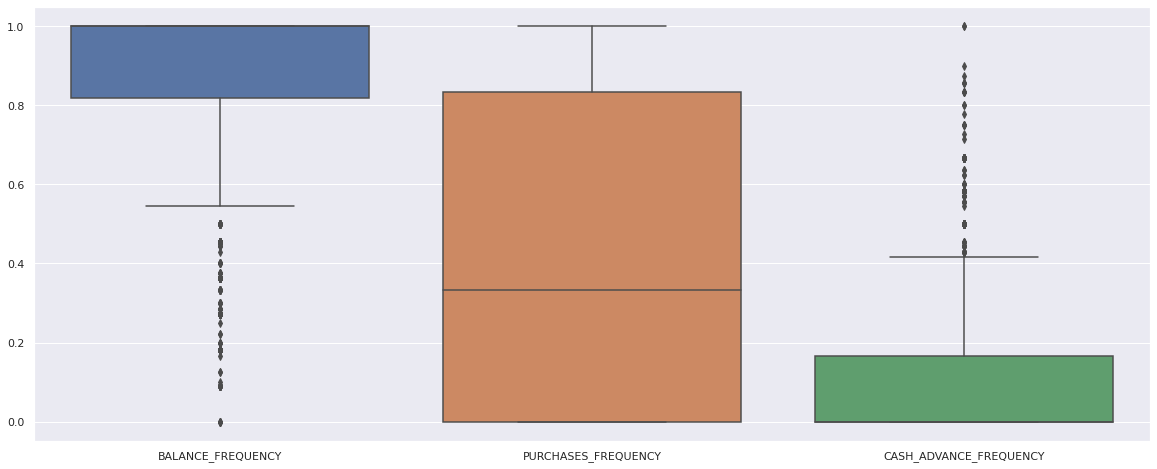

In [ ]:
#Visualización de todas las variables numéricas con valores entre 0 y 1
fig=plt.figure(figsize=(20,8))

#Pasamos las siguiente columnas que tienen datos entre 0 y 1 a otra variable para graficarlas
#'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'
datos_01 = datos_t[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',  'CASH_ADVANCE_FREQUENCY']].copy()

ax = sns.boxplot(data=datos_01, orient="v")

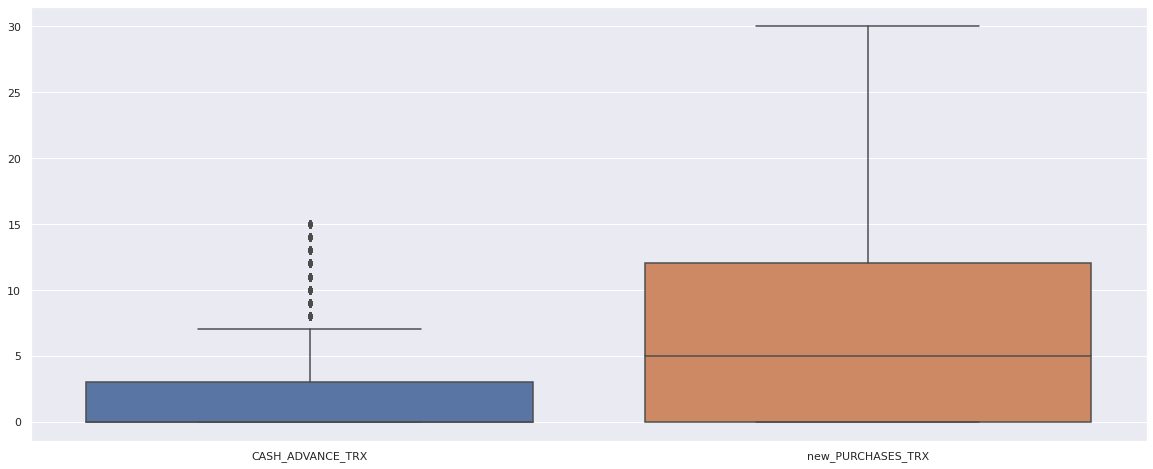

In [ ]:
#Visualización de todas las variables numéricas con valores entre 0 y 30
fig=plt.figure(figsize=(20,8))

#Pasamos las siguiente columnas que tienen datos entre 0 y 30 a otra variable para graficarlas
#'CASH_ADVANCE_TRX', 'new_PURCHASES_TRX', 'new_TENURE'
datos_decimas = datos_t[['CASH_ADVANCE_TRX', 'new_PURCHASES_TRX']].copy()

ax = sns.boxplot(data=datos_decimas, orient="v")

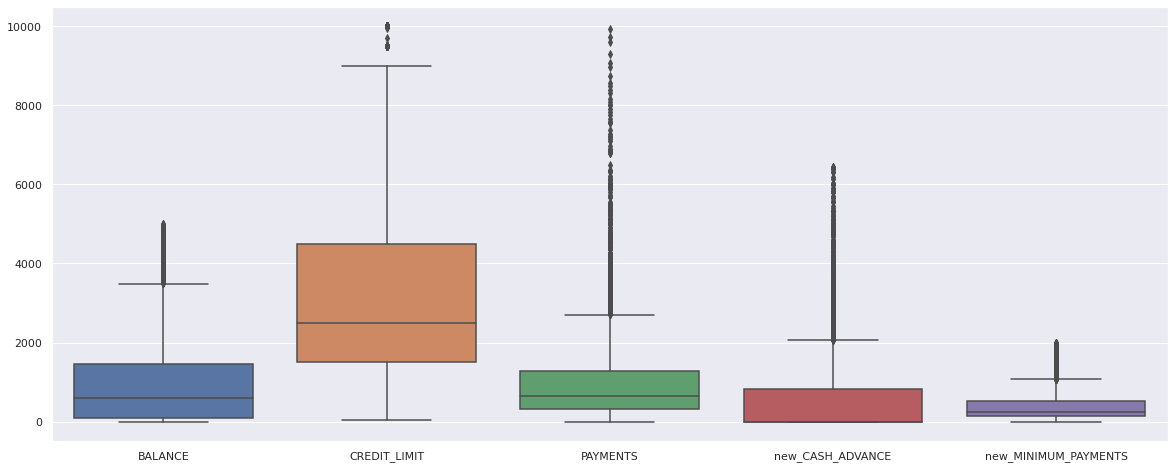

In [ ]:
#Visualización de todas las variables numéricas con valores en miles
fig=plt.figure(figsize=(20,8))
datos_miles = datos_t.drop(['CASH_ADVANCE_TRX', 'new_PURCHASES_TRX','BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
                             'CASH_ADVANCE_FREQUENCY'], axis=1)
ax = sns.boxplot(data=datos_miles, orient="v")

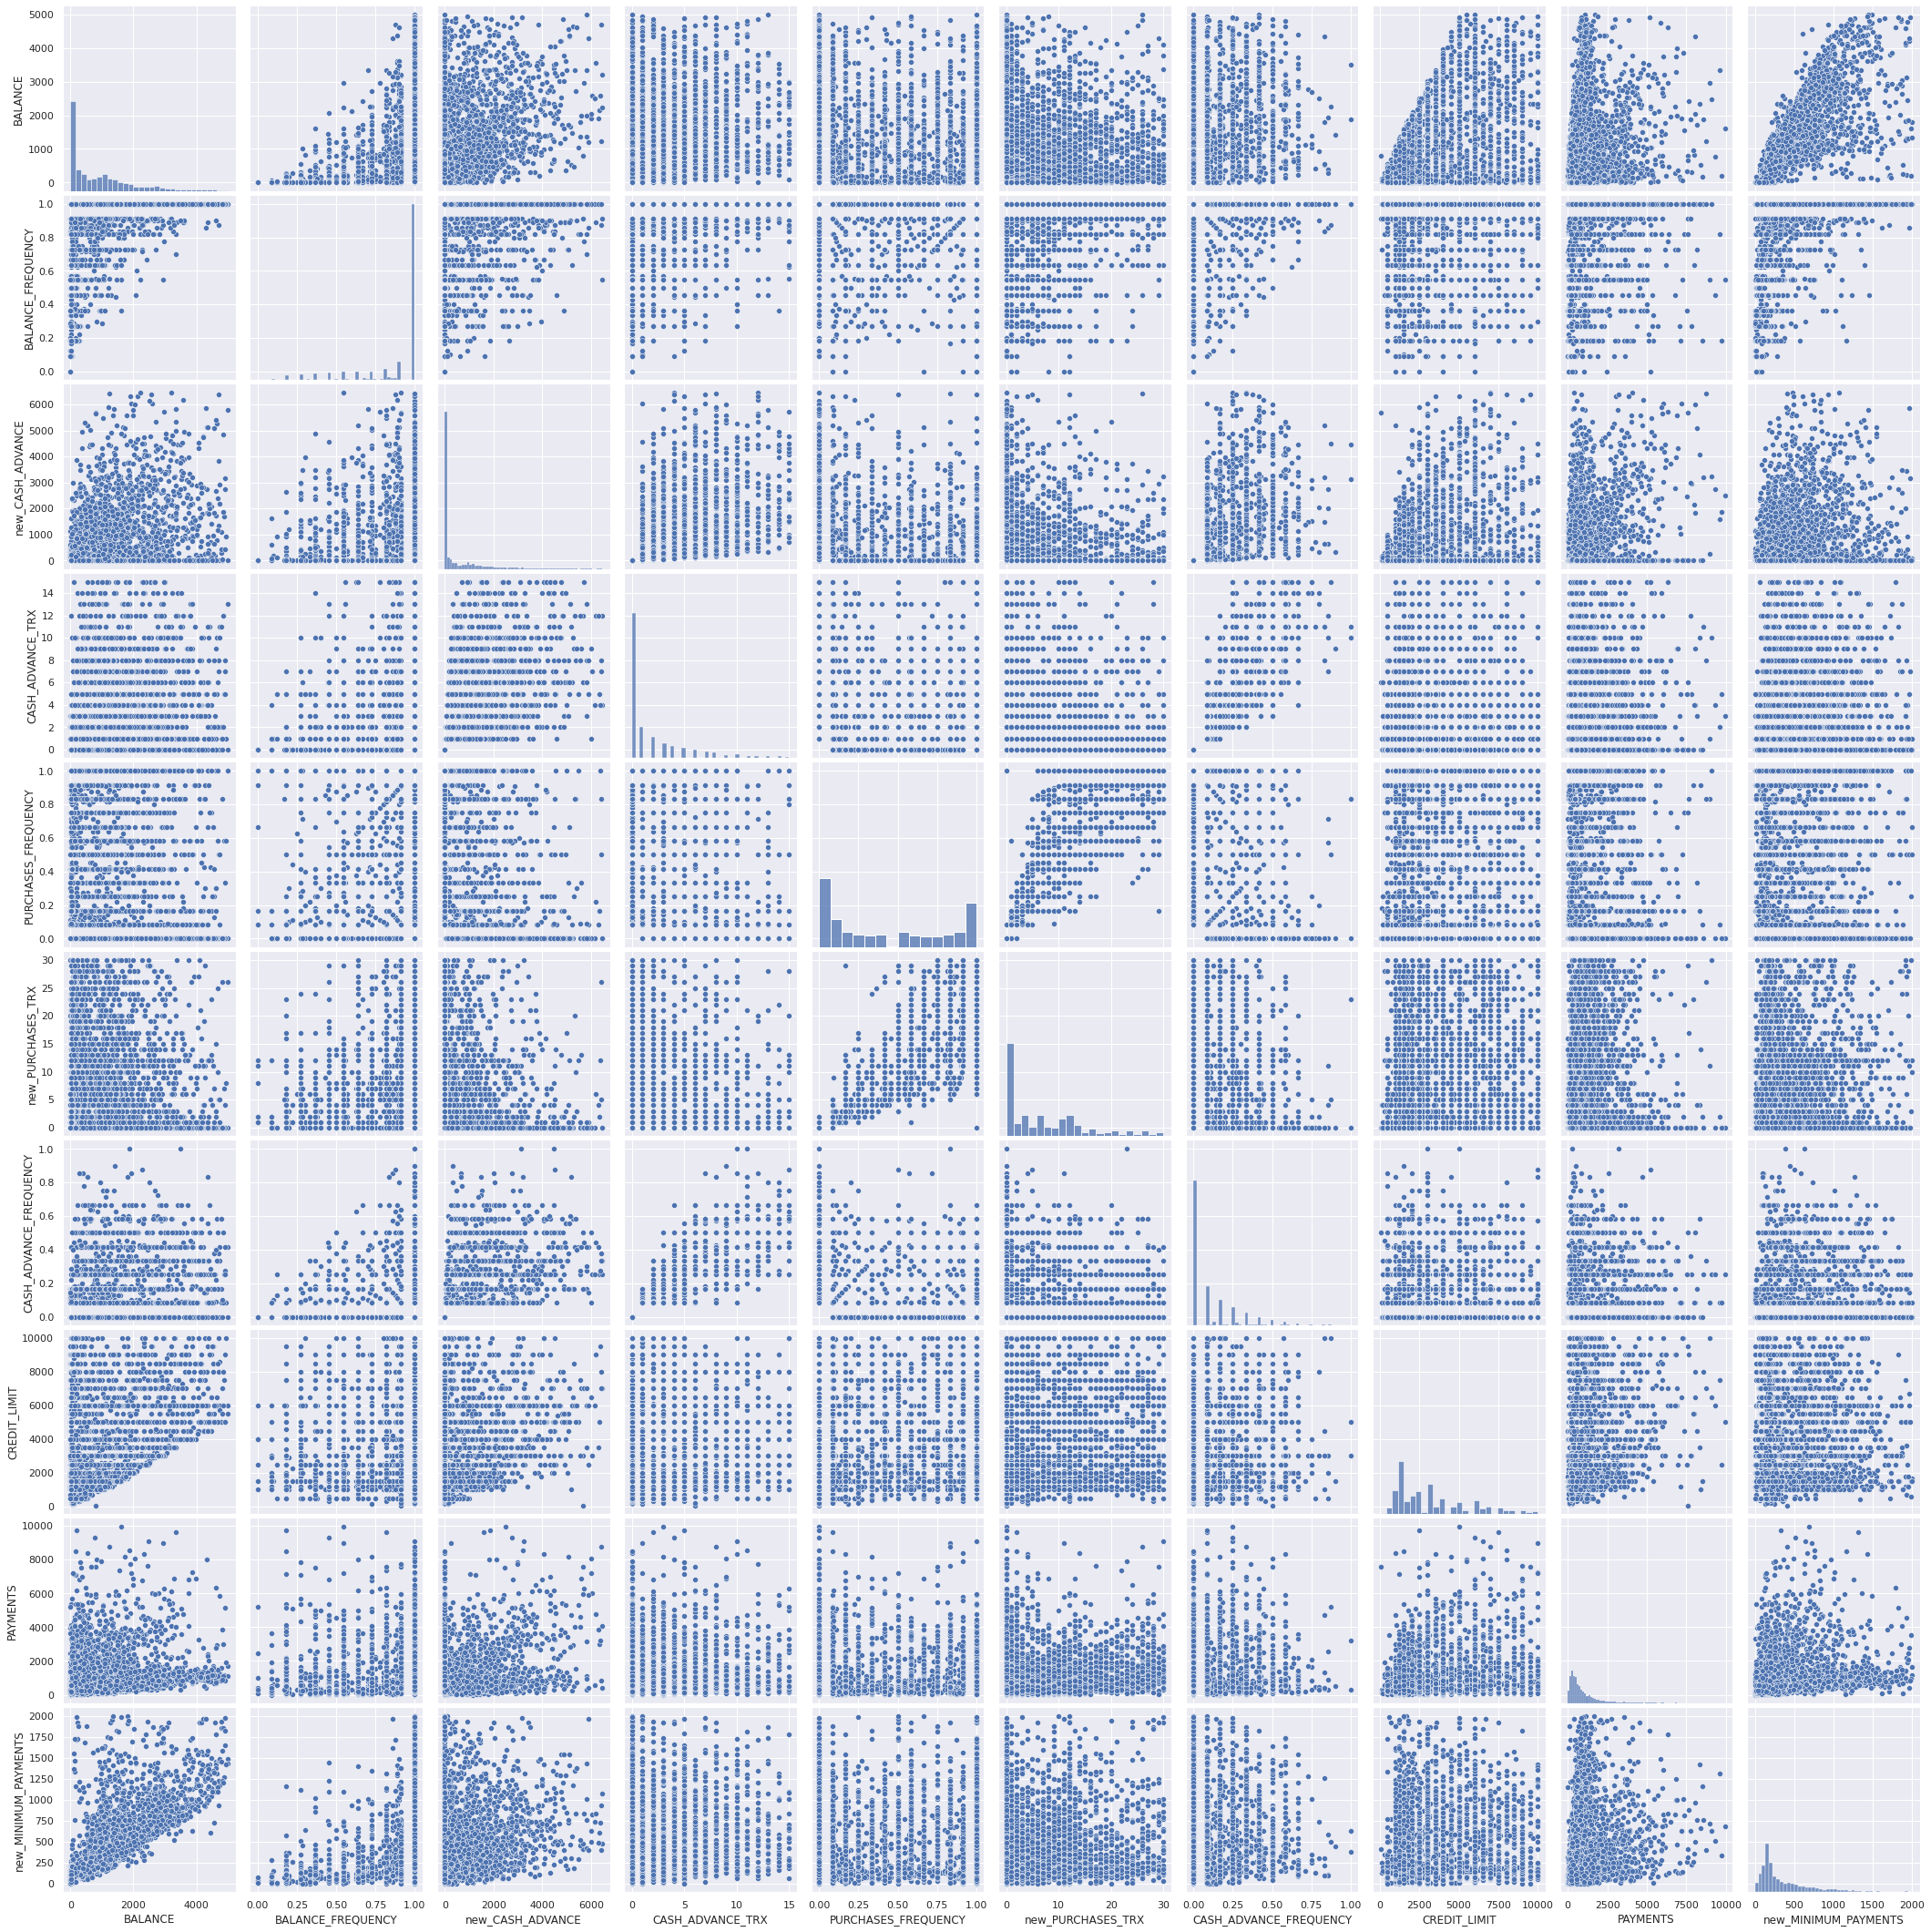

In [ ]:
# Ver si hay grupos naturales en los datos
sns.pairplot(datos_t, height=3,vars=['BALANCE','BALANCE_FREQUENCY', 'new_CASH_ADVANCE','CASH_ADVANCE_TRX',
                                     'PURCHASES_FREQUENCY',  'new_PURCHASES_TRX', 'CASH_ADVANCE_FREQUENCY',
                                      'CREDIT_LIMIT', 'PAYMENTS',  'new_MINIMUM_PAYMENTS'  ],kind='scatter')     

### 4.3 Construir el modelo
¿Qué función utilizar para realizar k-means y qué parámetros requiere?

In [ ]:
selected_cols = ['CASH_ADVANCE_FREQUENCY','BALANCE_FREQUENCY']

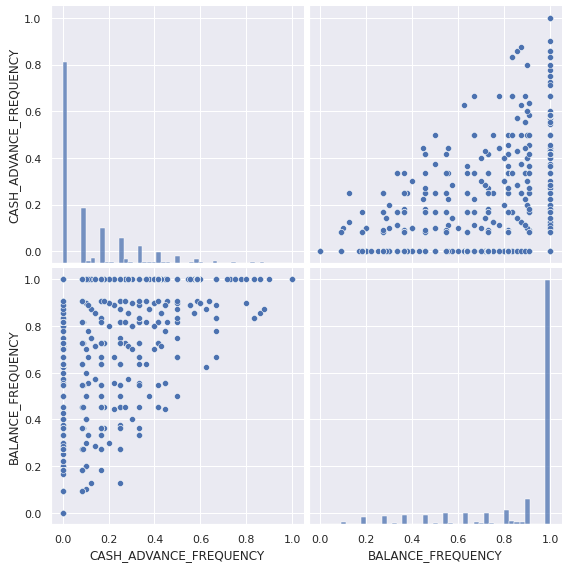

In [ ]:

sns.pairplot(datos_t, height=4,vars=selected_cols,kind='scatter')

In [ ]:
# El negocio quiere que empecemos con calma, así que nos sugiere un clustering para obtener dos segmentos.
kmeans = KMeans(n_clusters=3, random_state=0) 
datos_k=datos_t[selected_cols]
kmeans = kmeans.fit(datos_k)

In [ ]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = datos_k.to_numpy()
cols_number

array([[0.125   , 0.875   ],
       [0.083333, 1.      ],
       [0.      , 1.      ],
       ...,
       [0.      , 0.272727],
       [0.083333, 1.      ],
       [0.083333, 1.      ]])

In [ ]:
#Consultar el los labels del clúster asignado a cada fila 
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

Es dificil de entender el resultado general, por lo que acudimos a la visualización

### 4.4. Visualizar el resultado

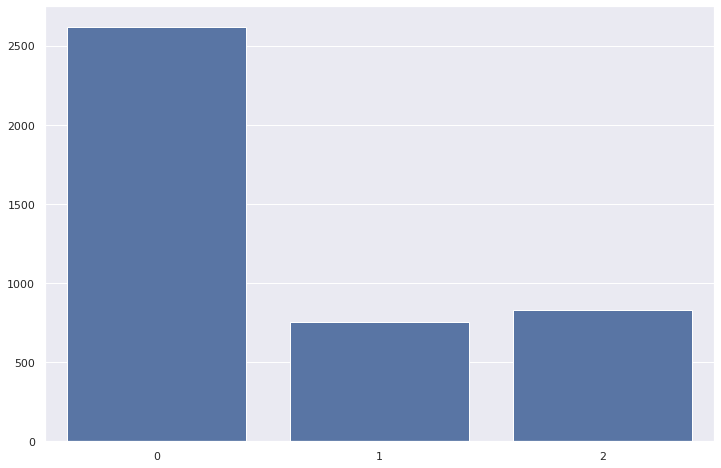

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datos_t['Cluster'] = labels

cluster_distrib = datos_t['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datos_t.groupby('Cluster').count()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
Cluster,,,,,,,,,,
0,2617,2617,2617,2617,2617,2617,2617,2617,2617,2617
1,755,755,755,755,755,755,755,755,755,755
2,830,830,830,830,830,830,830,830,830,830


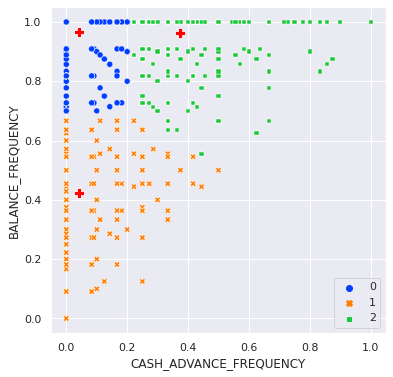

In [ ]:
# Ver gráficamente los elementos de los diferentes clúster
fig = plt.figure(figsize=(6,6))
ax = sns.scatterplot(data = datos_t, 
                     x = selected_cols[0],
                     y = selected_cols[1], 
                     hue = kmeans.labels_, 
                     style = kmeans.labels_,
                     palette = 'bright')

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,1], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)


In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[','CASH_ADVANCE_FREQUENCY', ' ' , 'BALANCE_FREQUENCY', ']]', kmeans.cluster_centers_)

Centroides: [[ CASH_ADVANCE_FREQUENCY   BALANCE_FREQUENCY ]] [[0.04125127 0.96614824]
 [0.043075   0.4245288 ]
 [0.37380863 0.96405468]]


In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


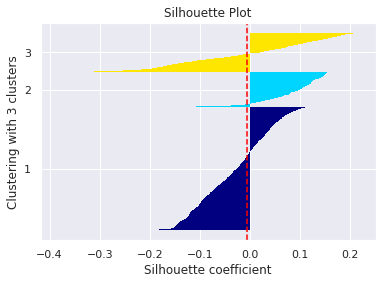

In [ ]:
# Esta función puede tardar varios minutos
plot_silhouette(data = datos_t, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with 3 clusters')

### 4.5 Analizar y concluir
La duración es la varible que aporta más en los clústeres generados. Con respecto al volumen se observa que en el grupo de los rojos tiene registros con valores bajos y contiene los registros que originalmente eran nulos.

<span style="color:red"> ¿Qué pasaría si quito del análisis los datos nulos o los valores atípicos? </span>

## 5. Iteración2. Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiper-parámetros
Te proponemos trabajar con las columnas nomralizadas, ¿entiendes por qué hacerlo? 
Además, vamos a probar con un método para la selección del parámetro k. 

### 5.1. Preparación de datos

In [ ]:
selected_cols = ['new_MINIMUM_PAYMENTS','BALANCE_FREQUENCY','CASH_ADVANCE_FREQUENCY']

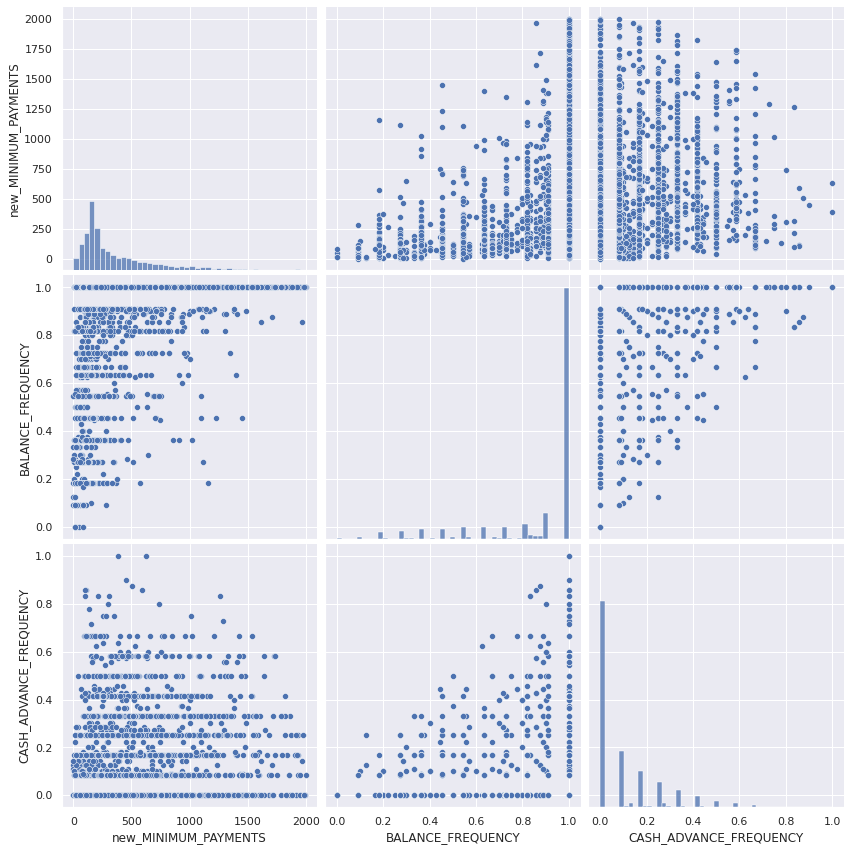

In [ ]:
sns.pairplot(datos_t, height=4,vars=selected_cols,kind='scatter')

In [ ]:
#TODO: Aplicar métodos para normalizar y estandarizar los datos, uno a la vez y concluir

from numpy import asarray

#MinMaxScaler
mms = MinMaxScaler()
#StandardScaler
#mms = StandardScaler()

datos_t_norm = mms.fit_transform(datos_t.copy())
saved_cols = datos_t.columns

datos_t_norm = pd.DataFrame(datos_t_norm, columns =saved_cols)



In [ ]:
# Mirar  los estadísticos y revisar el resultado de la normalización
datos_t_norm.describe()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS,Cluster
count,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000
mean,0.191611,0.868419,0.132651,0.426991,0.107267,0.328045,0.106450,0.091717,0.249762,0.196261,0.287363
std,0.212797,0.229305,0.211156,0.382462,0.157140,0.232361,0.122560,0.166636,0.262430,0.184649,0.399881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016989,0.818182,0.000000,0.000000,0.000000,0.145729,0.033284,0.000000,0.000000,0.076523,0.000000
50%,0.121730,1.000000,0.000000,0.333333,0.000000,0.246231,0.064399,0.000000,0.166667,0.116522,0.000000
75%,0.289781,1.000000,0.200000,0.833333,0.166667,0.447236,0.129014,0.127643,0.400000,0.261791,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2. Encontrar el número óptimo de clústeres utilizando el método del codo

In [ ]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

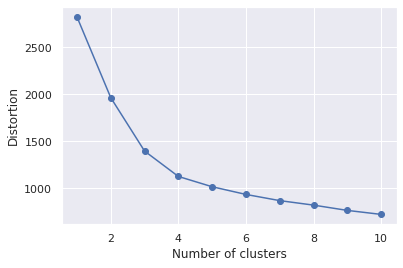

In [ ]:
plot_distortion(datos_t_norm,1,11)

Según este método, el número óptimo de cluster es 3

### 5.3. Construir el nuevo modelo con el número de clústeres obtenido

In [ ]:
#TODO: Completar de acuerdo con la gráfica el número de clusters
kmeans2 = KMeans(n_clusters=3, random_state=0) 
kmeans2 = kmeans.fit(datos_t_norm[selected_cols])


### 5.4. Visualizar el resultado

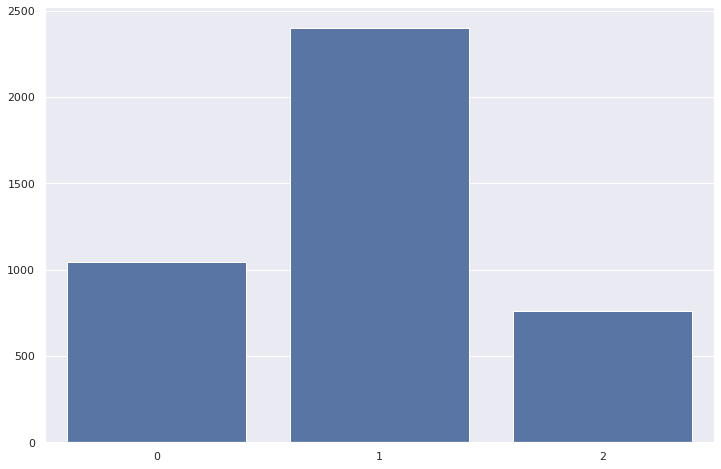

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datos_t_norm['Cluster'] = labels

cluster_distrib = datos_t_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datos_t_norm.groupby('Cluster').count()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,new_CASH_ADVANCE,new_PURCHASES_TRX,new_MINIMUM_PAYMENTS
Cluster,,,,,,,,,,
0,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
1,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
2,760,760,760,760,760,760,760,760,760,760


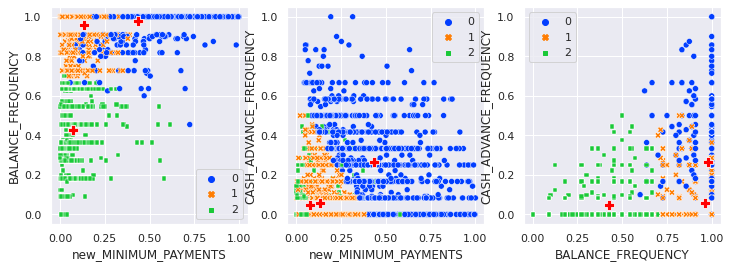

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (12,4))

ax = axes[0]
sns.scatterplot(data = datos_t_norm, x = selected_cols[0],y = selected_cols[1], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,1], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)


ax = axes[1]
sns.scatterplot(data = datos_t_norm, x = selected_cols[0],y = selected_cols[2], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,2], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)

ax = axes[2]
sns.scatterplot(data = datos_t_norm, x = selected_cols[1],y = selected_cols[2], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,1], 
                y = kmeans.cluster_centers_[:,2], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)


In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[','new_MINIMUM_PAYMENTS', ' ' , 'BALANCE_FREQUENCY', '','CASH_ADVANCE_FREQUENCY'']]', kmeans2.cluster_centers_)


Centroides: [[ new_MINIMUM_PAYMENTS   BALANCE_FREQUENCY  CASH_ADVANCE_FREQUENCY]] [[0.43591474 0.97875268 0.26399088]
 [0.13134531 0.96051431 0.05885776]
 [0.0734791  0.42636371 0.04580331]]


('', '', '')

### 5.5. Evaluar la calidad de los clústeres obtenidos

In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


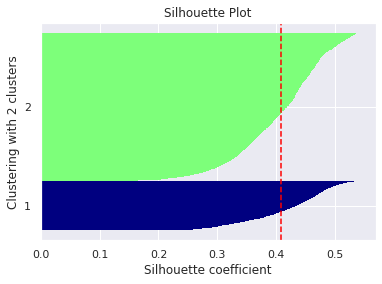

In [ ]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)
plot_silhouette(data = datos_t_norm, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

[0 1 2]


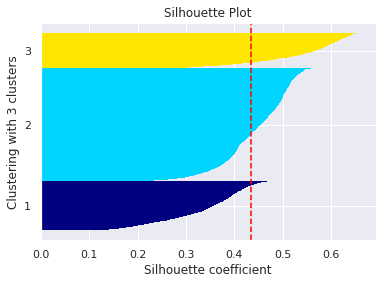

In [ ]:
# Esta función puede tardar varios minutos
plot_silhouette(data = datos_t_norm, 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering with 3 clusters')

[0 1 2 3]


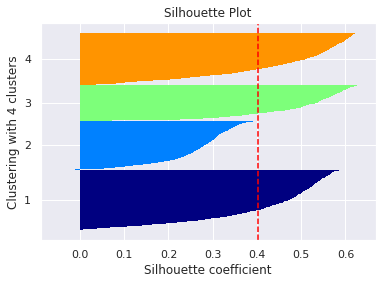

In [ ]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)
plot_silhouette(data = datos_t_norm, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

### 5.6 Análisis y conclusiones
<span style="color:red"> Dado que el mejor número de cluster es 3, se procede con esta cantidad
</span>

In [ ]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Crea los prototipos
df_pro = pd.DataFrame(np.transpose(km.cluster_centers_), columns = range(1, n_clusters +1))
df_pro['column'] = datos_t.columns
df_pro=df_pro[:9]
df_pro

,1,2,3,column
0,0.133009,0.444684,0.029690,BALANCE
1,0.960481,0.978793,0.426364,BALANCE_FREQUENCY
2,0.068000,0.331926,0.063596,CASH_ADVANCE_TRX
3,0.519545,0.321943,0.278742,PURCHASES_FREQUENCY
4,0.058724,0.263906,0.045803,CASH_ADVANCE_FREQUENCY
5,0.315447,0.368876,0.311848,CREDIT_LIMIT
6,0.091224,0.144988,0.101693,PAYMENTS
7,0.045225,0.224937,0.055881,new_CASH_ADVANCE
8,0.301972,0.203807,0.147895,new_PURCHASES_TRX


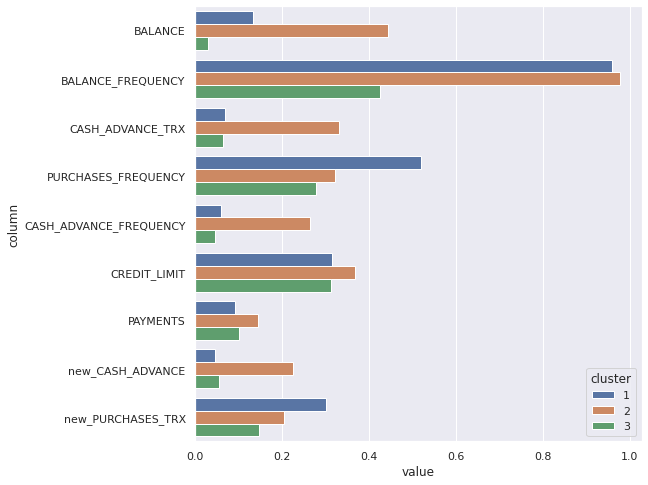

In [ ]:
resp = []
for i in range(1, n_clusters+1 ):
    df1 = df_pro[['column',i]].rename(columns = {i:'value'})
    df1['cluster'] = i
    resp.append(df1)

df_plot = pd.concat(resp, ignore_index = True)


fig = plt.figure(figsize=(8,8))
sns.barplot(data = df_plot, y = 'column', x = 'value', hue = 'cluster', orient = 'h')

## 7. Concluir para dar una respuesta a la empresa